# Final Project Report

##### Group Members:
Peter Klinkmueller, Archan Patel, Will Ye, Jason Zhang

Repository: https://github.com/pklinkmueller/mlo_final_project

## Introduction
For our project, we seek to compare the convergence rates of a number of descent algorithms for two different objectives, over multiple data sets, and utilizing three different learning rates.

## Methods
In this section of our report, the different objectives, descent algorithms, and learning rates are discussed. 

* ### Objectives:
We implemented two different objectives for our project - logsitic regression and a support vector machine.

   __Logistic Regression__

  With our prediction as:
   $$h(x)= \frac{1}{1+e^{x\cdot w}} $$
   Our loss function in our implementation is:
   
   $$-y^T \log h - (1-y)^T \log (1-h)$$

   And the gradient to be the below, where $m$ is our sample size:
    
    $$\frac{1}{m}x^T(h-y)$$
   
   Given that we had a binary classification task(from our pulled datasets), Logistic Regression is an appropriate classifier for the task. Smoothness of the Logistic Loss coupled with a relatively simple classification task allowed us to focus more on the implementation of the descent algorithms we chose and have an easier time analyzing the relative convergence rates of each algorithm for our analysis.
 
   __Support Vector Machine__

   With our prediction as:
   $$h(x)= \begin{cases} \mbox{1} & \mbox{$x\cdot w \geq 0$}  \\ \mbox{-1} & \mbox{$x\cdot w < 0$} \end{cases}$$
   The loss function in our implementation is hinge loss, as such:
   $$\ell_i= \begin{cases} \mbox{0} & \mbox{$1- y(x\cdot w) < 0$}  \\ \mbox{$1- y(x\cdot w)$} & \mbox{$1- y(x\cdot w) \geq 0$} \end{cases}$$
   $$\ell = c(w^T\cdot w) + \frac{1}{m}\sum_{i=1}^m\ell_i$$
   
   And the gradient below, where $m$ is our sample size:
   
   $$cw + \sum_{i=0}^m(-y_i x_i > 0)$$
      
   The basic intuition behind SVMs here is that it maxmimizes the margin between our two classes and the single decision boundary.
  

* ### Descent Methods
We implemented four different descent methods (with the objects taking in a batch size, which allowed for easy modification of gradient descent to be used to implement stochastic gradient descent).

   __Gradient Descent__
   This is our baseline descent method, with the implementation using the usual simple update rule.

   __Stochastic Gradient Descent__
   As noted above, we simply used the GradientDescent descent method object to run a model using stochastic gradient descent by    simply changing the batch size to be smaller than the number of training samples. We run mini-batches as well, testing       stochastic gradient descent for batch sizes: $\{1, 10, 100\}$.

   __Nesterov's Accelerated Gradient Descent__

   An implementation of an accelerated gradient descent method in which there is some "momentum" that is carried from previous iterations and used to make a step in next iterations. It is a proven method of increasing the convergence performance of gradient descent.

   __Stochastic Variance Reduced Gradient Descent__
  
   The stochastic variance reduced gradient (SVRG) descent method is designed in order to allow faster convergence via a higher constant step size than can typically be used to stochastic methods. Usually, the variance of each step of a stochastic method is very large because moving using a gradient over one example has inherently far more variance than a gradient over all training samples. However, SVRG manages to factor out the variance, allowing for a larger step size. This is done by calculating a mean-gradient over all of the training samples at each iteration of the algorithm, and then making stochastic updates using this average vector, the previous weight vector, and an internally updating weight vector. We will not test the dynamic learning rate methods on this algorithm, since it inherently manages the step size by eliminating the variance of each stochastic update.
    
   We aim to use this descent algorithm in order to increase our convergence rate relative to our gradient descent implementation.
   
  __Mirror Descent__

   Mirror Descent allows for the generalization of the idea of "distance" between two objects in a space(formally a Bregman Divergence). By generalizing this distance function we are able to formulate algorithms that more accurately fit the geometry of our space. Our motivation for using this was as another basis of comparison to see how a non Euclidean Distance function would affect the speed of convergence. A standard gradient descent is simply a mirror descent with a Euclidean Distance function. For ours we chose to implement using negative entropy as our Mirror Map. Our Bregman Divergence would then just be the KL divergence(proof through expansion of negative entropy in the notes).
    
   This formulation is defined as Exponentiated Gradient Descent, Kivinen and Warmuth [1997].
   In order to get it to work for our datasets in order to compare, we use a slightly modified version that involves storing a weight vector with positive weights and a weight vector with negative weights which is known as $EG^{\pm}$, Kivinen and Warmuth [1997]. The formulation is the same as the regular Exponentiated Gradient Descent method and has the same update rule, we just store two different weight vectors(one positive , one negative) and sum those two in order to get the updated weight vector which take into account positive and negative weights($w_t = w_t^+ + w_t^-$).
    
   The update rule is as follows:
    
    $$x_i^{t+1} = x_i^t e^{-\eta_t\nabla f(x^t)_i}  1 \leq i \leq n$$
    
   Where n is the length of the weight vector

* ### Learning Rates
We explored four different learning rates.

   __Fixed__ 
   The fixed learning rate simply sets and uses a constant $\eta$ for the step size throughout the model fit.
   
   __Square Root Decay__
   The square root decay we implemented is of the form:
   $$ \eta_i = \eta * \frac{1}{\sqrt{i}} $$
   where $\eta$ is a set parameter and $i$ is the iteration number.
   
   __Exponential Decay__
   The exponential decay we implemented is of the form:
   $$ \eta_i = \eta * \frac{1}{\gamma * i} ,$$
   where $\eta$ and $\gamma$ are set parameters and $i$ is the iteration number.

   We wanted to see if this has a better or worse accelerating effect on the convergence of the algorithms compared to the square root decay scheme.

* ### Relative Convergence Condition
In order to perform our analysis, we relay upon a relative convergence check performed on the loss, $L$ after each iteration of a descent algorithm. This check is of the form:
$$ \frac{| L_{i-1} - L_i |}{L_i} < rel\_conv $$
where $rel\_conv$ is our relative convergence condition, which we set as $rel\_conv = 0.000001$, and $L_i$ is our loss at iteration $i$.

   This allows us to run each model fit up until it reaches this convergence, thus enabling a direct comparison on convergence rate by analyzing the relative runtime of each algorithm. This also means that all of our algorithms will converge to very close to the same loss, and thus the same accuracy, for each objective function/data set pair.

## Implementation
Here, we discuss how we went about implementing our methods.

* ### Overview
Our goal for the architecture and design for the coding portion was focused on modularization, since our setup for training runs requires plugging in and out different combinations of models, descent methods, and learning rates. Therefore, we decided having good design would make it easier for ourselves as we implemented more and more models and descent methods. Thus, we have seperate python files aptly named 'models.py', 'descent_algorithms.py', and 'learning_rates.py' that house the above. Additionally, we have a driver file in the datasets folder ('data.py') that allows for the loading and processing of datasets. The design also allows for others to easily use our framework as is, especially if they want to examine and implement additional models/descent methods different from the ones we've implemented. The datasets folder is organized so additional datasets can be included locally if desired, and loaded in 'data.py' file easily similar to what is already implemented.

* ### Objectives
We provide an abstract class and methods for models, with the methods specifically for fitting, prediction, calculating loss, and calculating the gradient. The abstracted functionality is common among the various objectives, and logistic regression and SVM are individually implemented in the same file. The same file also houses a train method, which is required and the same for all models.

* ### Descent Methods
The abstract class includes a stub for an update function, which is the only functionality that can be reasonably abstracted. Below the abstract class are the specific implementations of the specific descent methods we specified. In our code we instantiate a descent method object and pass it into an instantiated model object, which enables us to easily use different objectives and descent methods with one another.

* ### Learning Rates
Because we wanted to test non-fixed learning rates, we felt abstraction of a learning rate class made sense, mainly in terms of readibility. It also makes it easy if we or others wanted to use other learning rates.

## Libraries

We utilize both external libraries, like numpy and scikit-learn, as well as internally written libraries for the sake of modularity and simplicity of code within this notebook. The goal for modularizing the code base is so that running the different algorithms here can be clean and require as few parameters and extraneous code blocks as possible, enabling us to focus on analysis.

In [1]:
# External libraries:
import numpy as np
from sklearn.model_selection import train_test_split

# Internal libraries:
import datasets.data as data
from descent_algorithms import *
from learning_rates import *
from mean_testing import *
from models import *
from util import *

Using TensorFlow backend.


## Data
We use two different datasets for our analysis of our algorithms, all of which provide a binary classification problem.

The first one is Wisconsin breast cancer, which has 699 samples and nine features.  Features represent qualitative categorical data pertinent to breast cancer diagnosis. Labels indicate whether or not the patient had breast cancer. The only change we made to the dataset was to cut an unuseful column (patient ID#) and change the labels from two and four to zero and one. This particular dataset was used as a benchmark for our overall implemenation for all setups due to its small number of samples and features, which allows us to get results quickly.

The second one is cod-rna, which has 59,535 sample and eight features. The features represent frequencies of bases ('A', 'U', 'C') in two specific sequence areas, as well as a bioinformatic metric. Labels indiciate whether or not the target area represents a non-coding RNA. We chose this dataset because of its large sample size relative to the other two, since generally speaking larger sample size should lead to higher confidence in our predictions.

Here, we read in the data vectors and labels using the datasets/data utility functions, and then perform a train/test split of 80%/20% of the provided samples. The splitting is done using the train_test_split function from the sklearn.model_selection package, which randomizes the splits.

In [2]:
features, labels = data.load_wisconsin_breast_cancer()
wbc_X_train, wbc_X_test, wbc_y_train, wbc_y_test = train_test_split(
    features, labels, test_size=0.2)
wbc_n = wbc_X_train.shape[0]

M_features, M_labels = data.load_MNIST_13()
mnist_X_train, mnist_X_test, mnist_y_train, mnist_y_test = train_test_split(
    M_features, M_labels, test_size = 0.2)
mnist_n = mnist_X_train.shape[0]

cod_features, cod_labels = data.load_cod_rna()
cod_X_train, cod_X_test, cod_y_train, cod_y_test = train_test_split(
    cod_features, cod_labels, test_size = 0.2)
cod_n = cod_X_train.shape[0]

# Logistic Regression Analysis

### Setting Relative Convergence Condition

In [3]:
# relative convergence limit
rel_conv = 0.000001

### Wisconsin Breast Cancer Data Set
We begin our analysis with a look at the performance of our three $LearningRate$ types on the WBC data set for all of our descent algorithms, which we will abbreviate for the remainder of the analysis as: Gradient Descent (GD), Stochastic Gradient Descent (SGD), Nesterov's Accelerated Gradient Descent (AGD), Stochastic Variance Reduced Gradient Descent (SVRG), and Mirror Descent (MD).

#### Fixed Learning Rate


In [4]:
# initialize our learning rate object
lr = FixedRate(0.01)

We begin by instantiating our descent method objects:

In [5]:
# instantiate our descent methods
gd = GradientDescent()
sgd_1 = GradientDescent() # the GD algorithm is used for all SGD algorithms, 
                          # with the smaller batch size specified in the model
sgd_10 = GradientDescent()
sgd_100 = GradientDescent()
agd = NesterovAcceleratedDescent()
svrg = StochasticVarianceReducedGradientDescent()
md = MirrorDescent()

Next, we initialize all of our model objects (all logistic regression models in this case), with the appropriate parameters for each algorithm.

In [6]:
# LogisticRegression(DescentAlgorithm, LearningRate, max iterations, batch size, relative convergence)
gd_log = LogisticRegression(gd, lr, 5000, wbc_n, rel_conv)
sgd_1_log = LogisticRegression(sgd_1, lr, 2000, 1, rel_conv)
sgd_10_log = LogisticRegression(sgd_10, lr, 4000, 10, rel_conv)
sgd_100_log = LogisticRegression(sgd_100, lr, 4000, 100, rel_conv)
agd_log = LogisticRegression(agd, lr, 400, wbc_n, rel_conv)
svrg_log = LogisticRegression(svrg, lr, 20, wbc_n, rel_conv)
md_log = LogisticRegression(md, lr, 2000, wbc_n, rel_conv)

Then, we run the fit for each model (10 runs each, providing better results in the mean across the runs):

In [7]:
# fit(X , y , verbose-training-output)
print('Fitting gradient descent:')
gd_loss, gd_time = gd_log.fit(wbc_X_train, wbc_y_train, True)
print('\nFitting stochastic gradient descent, batch size = 1:')
sgd_1_loss, sgd_1_time = sgd_1_log.fit(wbc_X_train, wbc_y_train, True)
print('\nFitting stochastic gradient descent, batch size = 10:')
sgd_10_loss, sgd_10_time = sgd_10_log.fit(wbc_X_train, wbc_y_train, True)
print('\nFitting stochastic gradient descent, batch size = 100:')
sgd_100_loss, sgd_100_time = sgd_100_log.fit(wbc_X_train, wbc_y_train, True)
print('\nFitting accelerated gradient descent:')
agd_loss, agd_time = agd_log.fit(wbc_X_train, wbc_y_train, True)
print('\nFitting stochastic variance reduced gradient descent:')
svrg_loss, svrg_time = svrg_log.fit(wbc_X_train, wbc_y_train, True)
print('\nFitting mirror descent:')
md_loss, md_time = md_log.fit(wbc_X_train, wbc_y_train)

Fitting gradient descent:
Iter:        0 train loss: 375.213
Iter:      500 train loss: 220.166
Iter:     1000 train loss: 209.479
Iter:     1500 train loss: 206.338
Iter:     2000 train loss: 205.112
Iter:     2500 train loss: 204.560
Iter:     3000 train loss: 204.290
Converged in 3486 iterations.

Fitting stochastic gradient descent, batch size = 1:
Iter:        0 train loss: 407.672
Iter:      200 train loss: 238.721
Iter:      400 train loss: 241.532
Iter:      600 train loss: 244.984
Iter:      800 train loss: 368.716
Converged in 802 iterations.

Fitting stochastic gradient descent, batch size = 10:
Iter:        0 train loss: 399.348
Converged in 395 iterations.

Fitting stochastic gradient descent, batch size = 100:
Iter:        0 train loss: 374.372
Iter:      400 train loss: 226.029
Converged in 515 iterations.

Fitting accelerated gradient descent:
Iter:        0 train loss: 386.776
Iter:       40 train loss: 233.470
Iter:       80 train loss: 206.946
Iter:      120 train lo

In [8]:
acc = check_accuracy(gd_log, wbc_X_test, wbc_y_test)
print("GD Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy(sgd_1_log, wbc_X_test, wbc_y_test)
print("SGD 1 Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy(sgd_10_log, wbc_X_test, wbc_y_test)
print("SGD 10 Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy(sgd_100_log, wbc_X_test, wbc_y_test)
print("SGD 100 Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy(agd_log, wbc_X_test, wbc_y_test)
print("AGD Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy(svrg_log, wbc_X_test, wbc_y_test)
print("SVRG Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy(md_log, wbc_X_test, wbc_y_test)
print("MD Accuracy: {0:.2f}%".format(acc * 100))

GD Accuracy: 87.14%
SGD 1 Accuracy: 63.57%
SGD 10 Accuracy: 88.57%
SGD 100 Accuracy: 89.29%
AGD Accuracy: 87.14%
SVRG Accuracy: 87.14%
MD Accuracy: 87.14%


Then, we re-run this fitting for each of the algorithms nine more times in order to better smooth our expected loss results:

In [9]:
gd_loss, sgd_1_loss, sgd_10_loss, sgd_100_loss, agd_loss, svrg_loss, md_loss = logreg_wbc_fixed_runs(gd_loss, sgd_1_loss, 
    sgd_10_loss, sgd_100_loss, agd_loss, svrg_loss, md_loss, wbc_n, wbc_X_train, wbc_y_train)

GD average runtime: 1.0000309109687806
SGD_1 average runtime: 0.14710901498794557
SGD_10 average runtime: 0.2914625310897827
SGD_100 average runtime: 0.343511791229248
AGD average runtime: 0.0750724196434021
SVRG average runtime: 0.4204130792617798
MD average runtime: 0.44377683877944946


Then, we can plot the run-averaged losses for each algorithm:

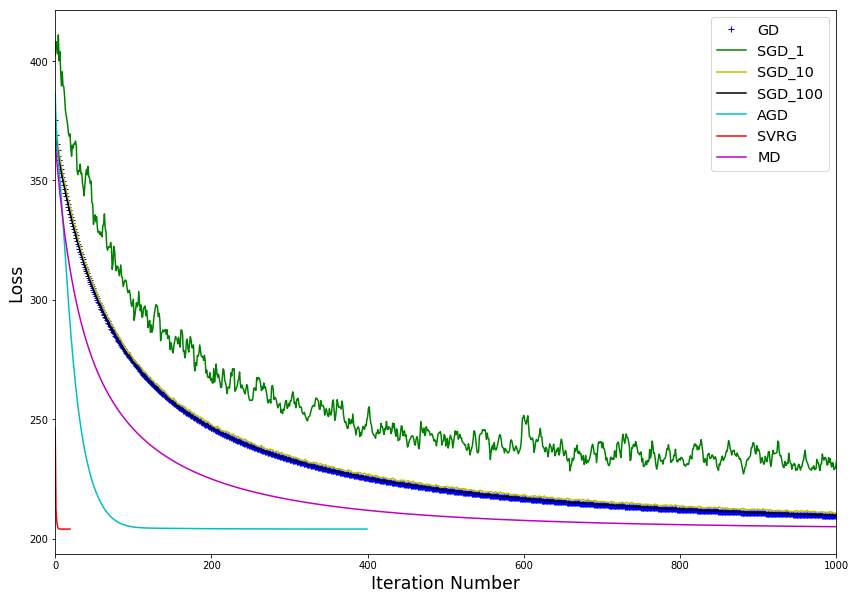

In [10]:
plot_fixed_losses(gd_loss, sgd_1_loss, sgd_10_loss, sgd_100_loss, agd_loss, svrg_loss, md_loss)

Now that we have shown our analysis process out step-by-step, the remainder of the analysis running of algorithms will be completed in single-cell blocks of code.

#### Exponential Decay Learning Rate

Fitting gradient descent:
Iter:        0 train loss: 415.958
Iter:      200 train loss: 221.344
Iter:      400 train loss: 220.729
Converged in 486 iterations.

Fitting stochastic gradient descent, batch size = 1:
Iter:        0 train loss: 410.429
Iter:      200 train loss: 266.906
Iter:      400 train loss: 235.872
Iter:      600 train loss: 379.711
Iter:      800 train loss: 225.807
Iter:     1000 train loss: 239.024
Converged in 1109 iterations.

Fitting mirror descent:
Iter:        0 train loss: 595.491
Iter:      200 train loss: 221.207
Converged in 294 iterations.


GD Accuracy: 90.00%
SGD 1 Accuracy: 89.29%
MD Accuracy: 89.29%
GD average runtime: 0.3852388690216373
SGD_1 average runtime: 0.14356210015036844
MD average runtime: 0.44797764402447326


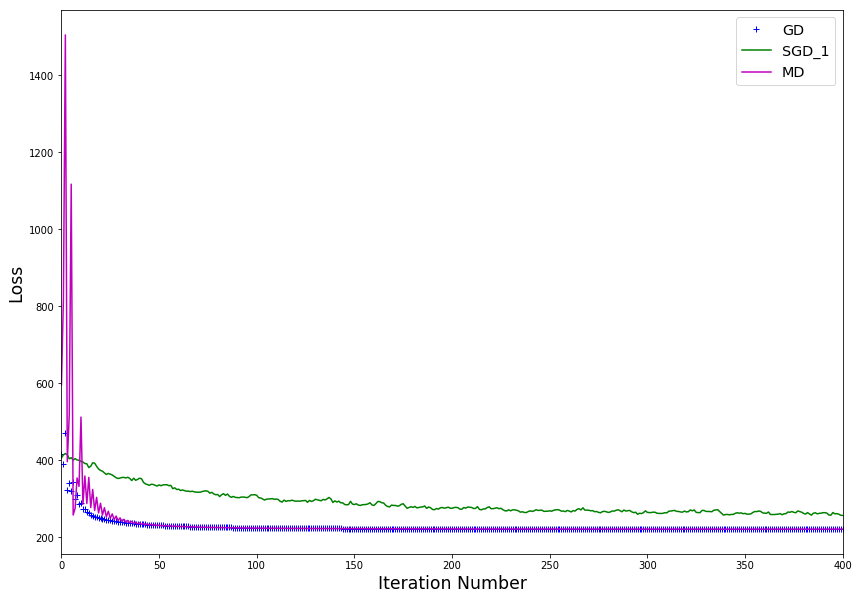

In [4]:
# instantiate our learning rate object
lr_gd = ExpDecayRate(0.1, 0.0001)
lr_sgd = ExpDecayRate(0.01, 0.00001)
lr_md = ExpDecayRate(0.1, 0.00001)

# instantiate our descent methods
gd = GradientDescent()
sgd_1 = GradientDescent()
md = MirrorDescent()

# instantiate logistic regression models
gd_log = LogisticRegression(gd, lr_gd, 2000, wbc_n, rel_conv)
sgd_1_log = LogisticRegression(sgd_1, lr_sgd, 2000, 1, rel_conv)
md_log = LogisticRegression(md, lr_md, 2000, wbc_n, rel_conv)

# fit the models...
print('Fitting gradient descent:')
gd_loss, gd_time = gd_log.fit(wbc_X_train, wbc_y_train, True)
print('\nFitting stochastic gradient descent, batch size = 1:')
sgd_1_loss, sgd_1_time = sgd_1_log.fit(wbc_X_train, wbc_y_train, True)
print('\nFitting mirror descent:')
md_loss, md_time = md_log.fit(wbc_X_train, wbc_y_train, True)

# print the test accuracies for each model
acc = check_accuracy(gd_log, wbc_X_test, wbc_y_test)
print("\n\nGD Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy(sgd_1_log, wbc_X_test, wbc_y_test)
print("SGD 1 Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy(md_log, wbc_X_test, wbc_y_test)
print("MD Accuracy: {0:.2f}%".format(acc * 100))

# run all model fits 99 more times for loss plotting
gd_loss, sgd_1_loss, md_loss = logreg_wbc_exp_runs(gd_loss, sgd_1_loss, md_loss, wbc_n, wbc_X_train, wbc_y_train)

# plot the loss convergences for each model
plot_dynamic_losses(gd_loss, sgd_1_loss, md_loss)

#### Square Root Decay Learning Rate

Fitting gradient descent:
Iter:        0 train loss: 386.776
Iter:      400 train loss: 221.810
Iter:      800 train loss: 212.016
Iter:     1200 train loss: 210.744
Converged in 1563 iterations.

Fitting stochastic gradient descent, batch size = 1:
Iter:        0 train loss: 386.776
Iter:      400 train loss: 316.430
Iter:      800 train loss: 259.792
Iter:     1200 train loss: 248.128
Iter:     1600 train loss: 226.475
Iter:     2000 train loss: 220.937
Iter:     2400 train loss: 220.138
Iter:     2800 train loss: 214.575
Converged in 2865 iterations.

Fitting mirror descent:
Iter:        0 train loss: 385.375
Iter:      200 train loss: 221.548
Iter:      400 train loss: 211.897
Iter:      600 train loss: 210.706
Iter:      800 train loss: 210.531
Converged in 829 iterations.


GD Accuracy: 85.00%
SGD 1 Accuracy: 81.43%
MD Accuracy: 85.00%
GD average runtime: 0.3073195664569585
SGD_1 average runtime: 0.17006931882916074
MD average runtime: 0.1903648569126322


/mnt/c/Users/klink/Documents/Machine Learning Optimization/project/mlo_final_project/mean_testing.py:192: RuntimeWarning: invalid value encountered in true_divide
  gd_loss /= gd_loss_counts
/mnt/c/Users/klink/Documents/Machine Learning Optimization/project/mlo_final_project/mean_testing.py:194: RuntimeWarning: invalid value encountered in true_divide
  md_loss /= md_loss_counts


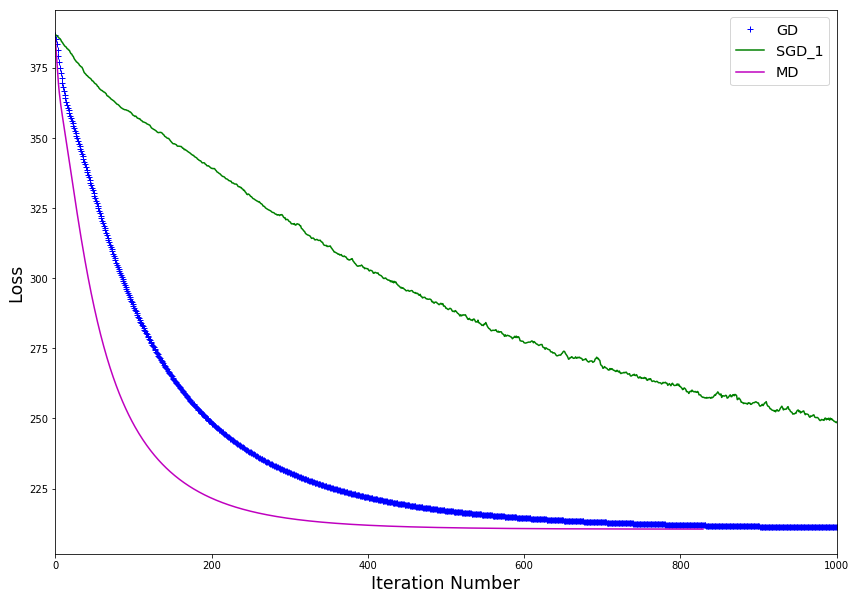

In [4]:
# initialize our learning rate object
lr_gd = SqrtDecayRate(0.001,1)
lr_sgd = SqrtDecayRate(0.0001,1)
lr_md = SqrtDecayRate(0.001,1)

# initialize our descent methods
gd = GradientDescent()
sgd_1 = GradientDescent()
md = MirrorDescent()

# initialize logistic regression models
gd_log = LogisticRegression(gd, lr_gd, 4000, wbc_n, rel_conv)
sgd_1_log = LogisticRegression(sgd_1, lr_sgd, 4000, 1, rel_conv)
md_log = LogisticRegression(md, lr_md, 2000, wbc_n, rel_conv)

# fit the models...
print('Fitting gradient descent:')
gd_loss, gd_time = gd_log.fit(wbc_X_train, wbc_y_train, True)
print('\nFitting stochastic gradient descent, batch size = 1:')
sgd_1_loss, sgd_1_time = sgd_1_log.fit(wbc_X_train, wbc_y_train, True)
print('\nFitting mirror descent:')
md_loss, md_time = md_log.fit(wbc_X_train, wbc_y_train, True)

# print the test accuracies for each model
acc = check_accuracy(gd_log, wbc_X_test, wbc_y_test)
print("\n\nGD Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy(sgd_1_log, wbc_X_test, wbc_y_test)
print("SGD 1 Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy(md_log, wbc_X_test, wbc_y_test)
print("MD Accuracy: {0:.2f}%".format(acc * 100))

# run all model fits 99 more times for loss plotting
gd_loss, sgd_1_loss, md_loss = logreg_wbc_sqrt_runs(gd_loss, sgd_1_loss, md_loss, wbc_n, wbc_X_train, wbc_y_train)

# plot the loss convergences for each model
plot_dynamic_losses(gd_loss, sgd_1_loss, md_loss, 2000)

### Logistic WBC Analysis

Looking first at our results from using a fixed learning rate, we can see the expected result that the three stochastic gradient descent methods converge in approximately the same number of iterations as gradient descent. The larger the batch size, we see less variance from this convergence trajectory, which is, again, as expected.

Mirror descent converges slightly faster than our gradient descent method, and accelerated gradient descent a significant amount better than that. However, AGD utilizes a full gradient over all of our training samples, as does SVRG, which can be seen as a tiny blip in the bottom left. This is misleading in terms of analysis, as SVRG requires $2n$ stochastic updates per outer iteration.

All methods converge to approximately the same loss and acheieve approximately the same test accuracy - which is what ought to happen as we are running the methods until they achieve our relative convergence condition.

Thus, we can now take a look at the average runtime for each method in order to see which ones were the most effective, converging the fastest for our problem. The best performance came from our Nesterov's Accelerated Gradient Descent, with a runtime that was half that of the second fastest converger, SGD with batch size 1. The other SGD mini-batches performed slightly worse, with the SVRG and MD performing about the same at a rate slightly higher than the SGD mini-batch methods and twice as fast as GD, which was the slowest performer. The size of the problem may have impacted how effective our SVRG and MD were at accelerated the convergence of the problem.

Looking at the performance of GD, SGD, and MD with the exponential decay learning rate, we can see that the algorithms appear to converge to better points (yielding higher test accuracy and slightly lower losses) than with the fixed learning rate. Additionally, GD converges much faster than before. However, SGD converges slower, which makes sense as a stochastic update will likely take longer to converge when the step size decreases quickly with each iteration, since all steps are not guaranteed to move toward the true optimum, meaning that larger earlier steps do not necessarily set up better, smaller steps later on in the model fitting. The runtime is proportionally effected, as the GD runtime decreases by $70\%$. Meanwhile, MD is not significantly affected, and maintains the same runtime.

The AGD and SVRG algorithms were not included in either of the dynamic learning rate analyses since they internally manage their step size (via a momentum metric and variance management, respectively).

Lastly, we observe the results from the square root decay learning rate run of the same three algorithms. The losses and test accuracies are similar to their original values using the fixed step size. GD achieves a slightly faster convergence than for the exponential decay learning rate, and MD sees an improved of halving its runtime using fixed and exponential decay learning rates. SGD, meanwhile, performs about the same as with the fixed step size, which is better than the exponential decay learning rate, which decreased its convergence rate.

In conclusion, we can see that, while the exponential decay and square root decay learning rates provide significant improvements for GD (with square root decay providing far better results for SGD and MD), the best choice from all of our method combinations is still our AGD algorithm using the fixed learning rate, as it outperformed all of our other methods in convergence rate.

### COD-RNA Data Set
Next, we setup the run for all of our descent methods on the COD-RNA dataset over the three learning rates.

#### Fixed Learning Rate

Fitting gradient descent:
Iter:        0 train loss: 32598.861
Iter:      900 train loss: 18584.690
Iter:     1800 train loss: 16588.686
Iter:     2700 train loss: 15930.471
Iter:     3600 train loss: 15644.636
Iter:     4500 train loss: 15502.608
Iter:     5400 train loss: 15426.237
Iter:     6300 train loss: 15383.019
Iter:     7200 train loss: 15357.684
Converged in 7809 iterations.

Fitting stochastic gradient descent, batch size = 1:
Iter:        0 train loss: 56535.507
Iter:      800 train loss: 20562.584
Iter:     1600 train loss: 16554.059
Iter:     2400 train loss: 15865.494
Iter:     3200 train loss: 34246.342
Iter:     4000 train loss: 16353.081
Converged in 4707 iterations.

Fitting stochastic gradient descent, batch size = 10:
Iter:        0 train loss: 32531.088
Iter:      800 train loss: 20222.324
Iter:     1600 train loss: 17259.991
Iter:     2400 train loss: 16942.672
Iter:     3200 train loss: 16744.872
Iter:     4000 train loss: 15522.237
Iter:     4800 train loss: 1

/mnt/c/Users/klink/Documents/Machine Learning Optimization/project/mlo_final_project/mean_testing.py:272: RuntimeWarning: divide by zero encountered in true_divide
  gd_loss /= gd_loss_counts
/mnt/c/Users/klink/Documents/Machine Learning Optimization/project/mlo_final_project/mean_testing.py:272: RuntimeWarning: invalid value encountered in true_divide
  gd_loss /= gd_loss_counts
/mnt/c/Users/klink/Documents/Machine Learning Optimization/project/mlo_final_project/mean_testing.py:273: RuntimeWarning: invalid value encountered in true_divide
  sgd_1_loss /= sgd_1_loss_counts
/mnt/c/Users/klink/Documents/Machine Learning Optimization/project/mlo_final_project/mean_testing.py:274: RuntimeWarning: invalid value encountered in true_divide
  sgd_10_loss /= sgd_10_loss_counts
/mnt/c/Users/klink/Documents/Machine Learning Optimization/project/mlo_final_project/mean_testing.py:275: RuntimeWarning: invalid value encountered in true_divide
  sgd_100_loss /= sgd_100_loss_counts
/mnt/c/Users/klink/D

GD average runtime: 202.37387776374817
SGD_1 average runtime: 1.5312435626983643
SGD_10 average runtime: 2.0564913749694824
SGD_100 average runtime: 1.1227452754974365
AGD average runtime: 4.162257194519043
SVRG average runtime: 16.850295782089233
MD average runtime: 134.21662378311157


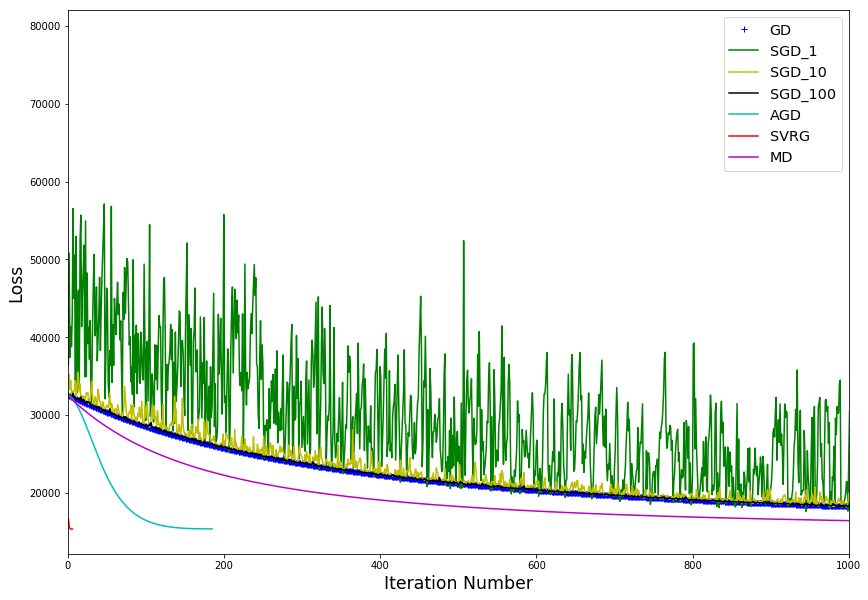

In [4]:
# fixed rate tuned to the COD-RNA data set
lr = FixedRate(0.00001)

# instantiate our descent methods
gd = GradientDescent()
sgd_1 = GradientDescent()
sgd_10 = GradientDescent()
sgd_100 = GradientDescent()
agd = NesterovAcceleratedDescent()
svrg = StochasticVarianceReducedGradientDescent()
md = MirrorDescent()

# instantiate the logisitic regression objects
gd_log = LogisticRegression(gd, lr, 9000, cod_n, rel_conv)
sgd_1_log = LogisticRegression(sgd_1, lr, 8000, 1, rel_conv)
sgd_10_log = LogisticRegression(sgd_10, lr, 8000, 10, rel_conv)
sgd_100_log = LogisticRegression(sgd_100, lr, 8000, 100, rel_conv)
agd_log = LogisticRegression(agd, lr, 400, cod_n, rel_conv)
svrg_log = LogisticRegression(svrg, lr, 20, cod_n, rel_conv)
md_log = LogisticRegression(md, lr, 6000, cod_n, rel_conv)

# and run the fit for each of these models, this time on the MNIST data set:
print('Fitting gradient descent:')
gd_loss, gd_time = gd_log.fit(cod_X_train, cod_y_train, True)
print('\nFitting stochastic gradient descent, batch size = 1:')
sgd_1_loss, sgd_1_time = sgd_1_log.fit(cod_X_train, cod_y_train, True)
print('\nFitting stochastic gradient descent, batch size = 10:')
sgd_10_loss, sgd_10_time = sgd_10_log.fit(cod_X_train, cod_y_train, True)
print('\nFitting stochastic gradient descent, batch size = 100:')
sgd_100_loss, sgd_100_time = sgd_100_log.fit(cod_X_train, cod_y_train, True)
print('\nFitting accelerated gradient descent:')
agd_loss, agd_time = agd_log.fit(cod_X_train, cod_y_train, True)
print('\nFitting stochastic variance reduced gradient descent:')
svrg_loss, svrg_time = svrg_log.fit(cod_X_train, cod_y_train, True)    
print('\nFitting mirror descent:')
md_loss, md_time = md_log.fit(cod_X_train, cod_y_train, True)

# displaying test accuracies
acc = check_accuracy(gd_log, cod_X_test, cod_y_test)
print("\n\nGD Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy(sgd_1_log, cod_X_test, cod_y_test)
print("SGD 1 Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy(sgd_10_log, cod_X_test, cod_y_test)
print("SGD 10 Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy(sgd_100_log, cod_X_test, cod_y_test)
print("SGD 100 Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy(agd_log, cod_X_test, cod_y_test)
print("AGD Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy(svrg_log, cod_X_test, cod_y_test)
print("SVRG Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy(md_log, cod_X_test, cod_y_test)
print("MD Accuracy: {0:.2f}%".format(acc * 100))

# run all model fits 1 more time for loss plotting
gd_loss, sgd_1_loss, sgd_10_loss, sgd_100_loss, agd_loss, svrg_loss, md_loss = logreg_cod_fixed_runs(gd_loss, sgd_1_loss, 
    sgd_10_loss, sgd_100_loss, agd_loss, svrg_loss, md_loss, cod_n, cod_X_train, cod_y_train)

# plot losses
plot_fixed_losses(gd_loss, sgd_1_loss, sgd_10_loss, sgd_100_loss, agd_loss, svrg_loss, md_loss)

#### Exponential Decay Learning Rate

Fitting gradient descent:
Iter:        0 train loss: 41717.372


/mnt/c/Users/klink/Documents/Machine Learning Optimization/project/mlo_final_project/models.py:75: RuntimeWarning: divide by zero encountered in log
  return np.dot(-y.T, np.log(h)) - np.dot((1 - y).T,np.log(1 - h))


Iter:      250 train loss: 31400.684
Converged in 390 iterations.

Fitting stochastic gradient descent, batch size = 1:
Iter:        0 train loss: 34977.499
Iter:      300 train loss: 37217.089
Iter:      600 train loss: 21628.346
Iter:      900 train loss: 30758.232
Iter:     1200 train loss: 17073.776
Iter:     1500 train loss: 20444.871
Iter:     1800 train loss: 25749.300
Iter:     2100 train loss: 24723.026
Iter:     2400 train loss: 16005.490
Iter:     2700 train loss: 26385.272

Fitting mirror descent:
Iter:        0 train loss: 32546.902
Iter:      200 train loss: 22226.363
Iter:      400 train loss: 19020.858
Iter:      600 train loss: 17589.376
Iter:      800 train loss: 16816.337
Iter:     1000 train loss: 16350.421
Iter:     1200 train loss: 16049.033
Iter:     1400 train loss: 15844.262
Iter:     1600 train loss: 15700.038
Iter:     1800 train loss: 15595.635


GD Accuracy: 87.16%
SGD 1 Accuracy: 87.36%
MD Accuracy: 87.49%
GD average runtime: 8.366009712219238
SGD_1 averag

/mnt/c/Users/klink/Documents/Machine Learning Optimization/project/mlo_final_project/mean_testing.py:339: RuntimeWarning: invalid value encountered in true_divide
  gd_loss /= gd_loss_counts


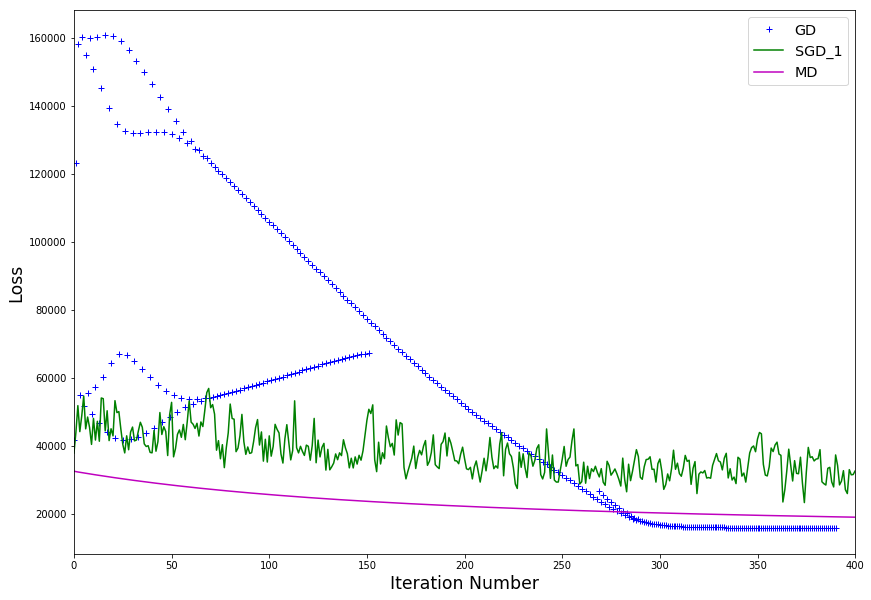

In [4]:
# instantiate our learning rate objects
lr_gd = ExpDecayRate(0.0001, 0.00001)
lr_sgd = ExpDecayRate(0.00001, 0.000001)
lr_md = ExpDecayRate(0.00001, 0.00001)

# instantiate our descent methods
gd = GradientDescent()
sgd_1 = GradientDescent()
md = MirrorDescent()

# instantiate logistic regression models
gd_log = LogisticRegression(gd, lr_gd, 2500, cod_n, rel_conv)
sgd_1_log = LogisticRegression(sgd_1, lr_sgd, 3000, 1, rel_conv)
md_log = LogisticRegression(md, lr_md, 2000, cod_n, rel_conv)

# fit the models...
print('Fitting gradient descent:')
gd_loss, gd_time = gd_log.fit(cod_X_train, cod_y_train, True)
print('\nFitting stochastic gradient descent, batch size = 1:')
sgd_1_loss, sgd_1_time = sgd_1_log.fit(cod_X_train, cod_y_train, True)
print('\nFitting mirror descent:')
md_loss, md_time = md_log.fit(cod_X_train, cod_y_train, True)

# print the test accuracies for each model
acc = check_accuracy(gd_log, cod_X_test, cod_y_test)
print("\n\nGD Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy(sgd_1_log, cod_X_test, cod_y_test)
print("SGD 1 Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy(md_log, cod_X_test, cod_y_test)
print("MD Accuracy: {0:.2f}%".format(acc * 100))

# run all model fits 4 more times for loss plotting
gd_loss, sgd_1_loss, md_loss = logreg_cod_exp_runs(gd_loss, sgd_1_loss, md_loss, cod_n, cod_X_train, cod_y_train)

# plot the loss convergences for each model
plot_dynamic_losses(gd_loss, sgd_1_loss, md_loss)

#### Square Root Decay Learning Rate

Fitting gradient descent:
Iter:        0 train loss: 33013.214
Iter:      400 train loss: 20824.227
Iter:      800 train loss: 16984.920
Iter:     1200 train loss: 15898.087
Iter:     1600 train loss: 15530.714
Iter:     2000 train loss: 15396.324
Iter:     2400 train loss: 15346.044
Iter:     2800 train loss: 15327.384
Converged in 3023 iterations.

Fitting stochastic gradient descent, batch size = 1:
Iter:        0 train loss: 33013.214
Iter:      600 train loss: 31821.931
Iter:     1200 train loss: 26975.492
Iter:     1800 train loss: 24589.024
Iter:     2400 train loss: 22037.433
Iter:     3000 train loss: 22168.738
Iter:     3600 train loss: 20897.341
Iter:     4200 train loss: 19082.009
Iter:     4800 train loss: 18220.960
Iter:     5400 train loss: 17470.203

Fitting mirror descent:
Iter:        0 train loss: 33007.348
Iter:      400 train loss: 26961.674
Iter:      800 train loss: 21923.781
Iter:     1200 train loss: 19123.392
Iter:     1600 train loss: 17596.860
Iter:     2000

/mnt/c/Users/klink/Documents/Machine Learning Optimization/project/mlo_final_project/mean_testing.py:390: RuntimeWarning: invalid value encountered in true_divide
  gd_loss /= gd_loss_counts


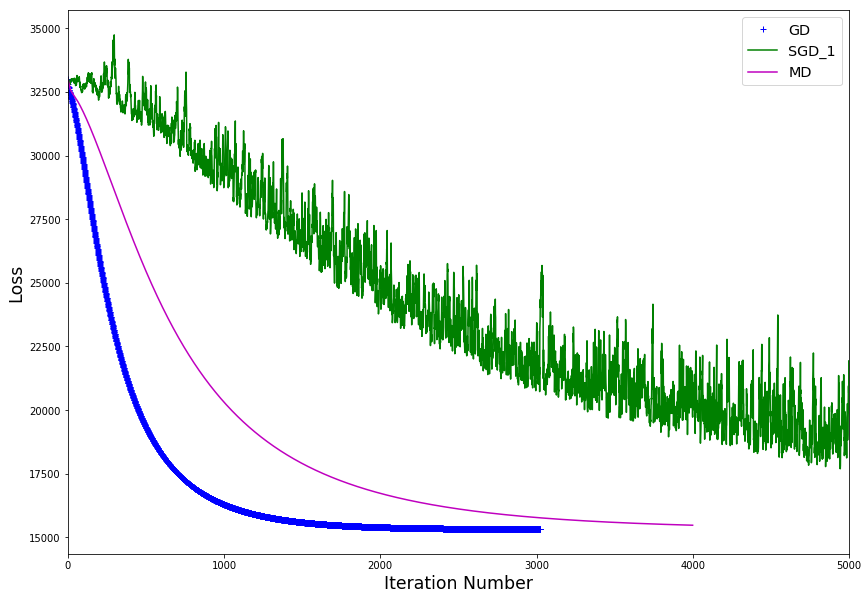

In [5]:
# instantiate our learning rate object
lr_gd = SqrtDecayRate(0.000001, 1.)
lr_sgd = SqrtDecayRate(0.0000001, 2.)
lr_md = SqrtDecayRate(0.000001, 10.)

# instantiate our descent methods
gd = GradientDescent()
sgd_1 = GradientDescent()
md = MirrorDescent()

# instantiate logistic regression models
gd_log = LogisticRegression(gd, lr_gd, 4000, cod_n, rel_conv)
sgd_1_log = LogisticRegression(sgd_1, lr_sgd, 6000, 1, rel_conv)
md_log = LogisticRegression(md, lr_md, 4000, cod_n, rel_conv)

# fit the models...
print('Fitting gradient descent:')
gd_loss, gd_time = gd_log.fit(cod_X_train, cod_y_train, True)
print('\nFitting stochastic gradient descent, batch size = 1:')
sgd_1_loss, sgd_1_time = sgd_1_log.fit(cod_X_train, cod_y_train, True)
print('\nFitting mirror descent:')
md_loss, md_time = md_log.fit(cod_X_train, cod_y_train, True)

# print the test accuracies for each model
acc = check_accuracy(gd_log, cod_X_test, cod_y_test)
print("\n\nGD Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy(sgd_1_log, cod_X_test, cod_y_test)
print("SGD 1 Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy(md_log, cod_X_test, cod_y_test)
print("MD Accuracy: {0:.2f}%".format(acc * 100))

# run all model fits 1 more times for loss plotting
gd_loss, sgd_1_loss, md_loss = logreg_cod_sqrt_runs(gd_loss, sgd_1_loss, md_loss, cod_n, cod_X_train, cod_y_train)

# plot the loss convergences for each model
plot_dynamic_losses(gd_loss, sgd_1_loss, md_loss, 5000)

### Logistic COD Analysis

The analysis of the COD data set is largely to see if there is any significant difference in performance of our methods as compared to running on the WBC data set.

We see largely the same type of plot in terms of the convergence trajectories for all of the methods. Similar test accuracies are also achieved compared to the WBC data set. In terms of convergence rate (runtime) performance, we can see that the best method for this data set was actuall mini-batch SGD with a batch size of 100, closely followed by plain SGD and mini-batch SGD of 10. AGD still performed within the same order of magnitude as these methods, however, and so we can see that it is still an excellent method for fitting a logsitic model. SVRG proved to be much more useful for this larger data set in that it performed comparatively much better to the other methods than it did for the WBC data set, and thoroughly beat out MD and GD for convergence rate. MD performed significantly better than GD, but was still in the same order of magnitude of convergence rate. This comparative convergence rate amongst the methods is slightly different than for the WBC data set, but all the methods except for SVRG performed in the same comparative realm as they did on WBC.

While the GD method does converge for the exponential decay learning rate, the trajectory the loss takes is bizarre, as it can be seen that there are first four, and then two, and finally one trajectory it takes before convergence. How it bounces between these paths while appearing to maintain all of them smoothly is something we are not sure how to explain, but it was interesting to see. In terms of performance, however, the exponential decay decreased the GD runtime from 202 seconds to 8.36 seconds on average, the SGD runtime from 1.5 seconds to 1.2 seconds on average, and the MD runtime from 134 seconds to 44 seconds on average. Which are all significant improvements made, while maintaining the same test accuracy and convergence. This is a much more impressive result than with the smaller WBC data set.

In a reversal from the performance on the WBC dataset, we can see that the square root decay learning rate is outperformed by the exponential decay learning rate in terms of runtime, as GD, SGD, and MD all converge faster using exponential decay. However, the bizarre convergence trajectory of the GD from exponential decay may mean that there is something specific to this problem configuration with this dataset going on. GD and MD still experience improvements in convergence rate as compared to fixed learning rate, while SGD takes a small step back.

On the whole, the COD data set largely onfirmed our results from running our methods on the WBC data set, with the differences that SVRG proved to be an effective method for this data set and exponential decay outperformed square root decay (though with odd trajectories).

# SVM Analysis

Now, we will carry out our analysis of the SVM objective.

We will perform largely the same analysis as with out logistic regression test, however, we will use a size 100 mini-batch SGD algorithm for the dynamic, decaying learning rates instead of the single SGD algorithm.

Again, a relative convergence of $rel\_conv = 0.000001$ will be used in order to compare the relative convergence rates of the different descent methods.

For penalty coefficient for bias applied to the hinge loss, we use a  $c$ of $0.00001$.

In [4]:
c = 0.00001

Before we can begin running our analysis, however, we need to convert our data sets' labels to be $[-1,1]$, rather than how they are currently configured as $[0,1]$. This is accomplished by running the train and test split label vectors through a simply utility function we have written for this purpose.

In [5]:
# label conversion for the Wisconsin Breast Cancer data set
wbc_y_train = zero_one_labels_to_signed(wbc_y_train)
wbc_y_test = zero_one_labels_to_signed(wbc_y_test)

# label conversion for the MNIST binarized data set
mnist_y_train = zero_one_labels_to_signed(mnist_y_train)
mnist_y_test = zero_one_labels_to_signed(mnist_y_test)

# lavel conversion for the COD-RNA data set
cod_y_train = zero_one_labels_to_signed(cod_y_train)
cod_y_test = zero_one_labels_to_signed(cod_y_test)

As with Logistic Regression, we begin with observing the performance of the SVM objective across the different algorithms for the different learning rate paradigms investigated, and then across the three data sets. The configuration of the executed cells is the same as with the Logistic Regression, but with SVM model objects instantiated in place of the LogisticRegression ones.

### Wisconsin Breast Cancer Data Set
We begin our SVM analysis by observing the algorithms' performance on the WBC data set.

#### Fixed Learning Rate

Fitting gradient descent:
Iter:        0 train loss: 454.963
Iter:     2000 train loss: 4.958
Iter:     4000 train loss: 0.437
Iter:     6000 train loss: 3.498
Iter:     8000 train loss: 0.490
Iter:    10000 train loss: 0.485
Iter:    12000 train loss: 1.292
Iter:    14000 train loss: 0.585
Iter:    16000 train loss: 0.450
Iter:    18000 train loss: 0.446

Fitting stochastic gradient descent, batch size = 100:
Iter:        0 train loss: 636.831
Converged in 1438 iterations.

Fitting accelerated gradient descent:
Iter:        0 train loss: 1.000
Iter:     2000 train loss: 1.289
Iter:     4000 train loss: 1.255
Iter:     6000 train loss: 0.920
Iter:     8000 train loss: 1.100
Iter:    10000 train loss: 1.158
Iter:    12000 train loss: 1.899
Iter:    14000 train loss: 1.079
Iter:    16000 train loss: 1.337
Converged in 17965 iterations.

Fitting stochastic variance reduced gradient descent:
Iter:        0 train loss: 485.951
Iter:      300 train loss: 7.426
Iter:      600 train loss: 1.29

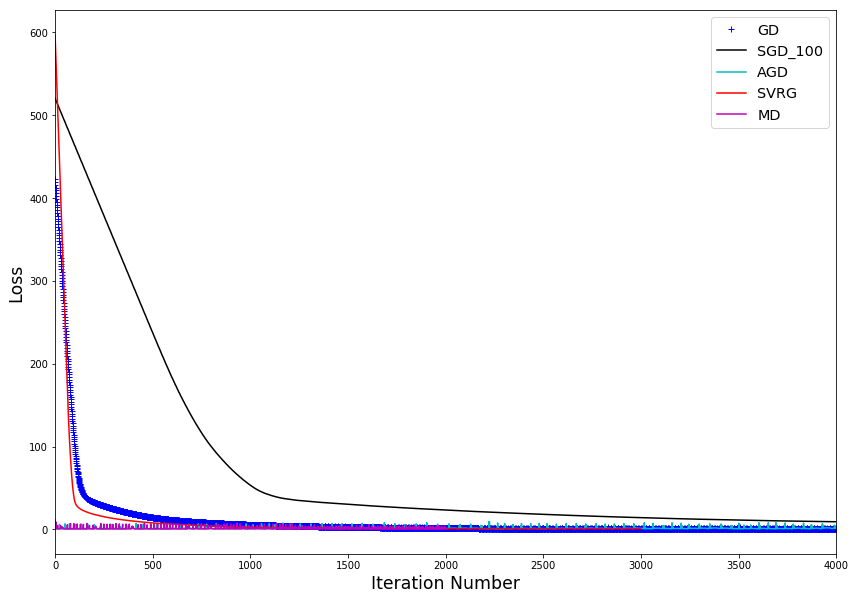

In [15]:
# instantiate our learning rate object
lr = FixedRate(0.0005)

# instantiate our descent methods
gd = GradientDescent()
sgd_100 = GradientDescent()
agd = NesterovAcceleratedDescent()
svrg = StochasticVarianceReducedGradientDescent()
md = MirrorDescent()

# instantiate all of the SVM model objects
gd_svm = SVM(gd, lr, c, 20000, wbc_n, rel_conv)
sgd_100_svm = SVM(sgd_100, lr, c, 20000, 100, rel_conv)
agd_svm = SVM(agd, lr, c, 20000, wbc_n, rel_conv)
svrg_svm = SVM(svrg, lr, c, 3000, wbc_n, rel_conv)
md_svm = SVM(md, lr, c, 2000, wbc_n, rel_conv)

# run fitting for all of the models
print('Fitting gradient descent:')
gd_loss, gd_time = gd_svm.fit(wbc_X_train, wbc_y_train, True)
print('\nFitting stochastic gradient descent, batch size = 100:')
sgd_100_loss, sgd_100_time = sgd_100_svm.fit(wbc_X_train, wbc_y_train, True)
print('\nFitting accelerated gradient descent:')
agd_loss, agd_time = agd_svm.fit(wbc_X_train, wbc_y_train, True)
print('\nFitting stochastic variance reduced gradient descent:')
svrg_loss, svrg_time = svrg_svm.fit(wbc_X_train, wbc_y_train, True)
print('\nFitting mirror descent:')
md_loss, md_time = md_svm.fit(wbc_X_train, wbc_y_train, True)

# print test accuracies
acc = check_accuracy_svm(gd_svm, wbc_X_test, wbc_y_test)
print("GD Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy_svm(sgd_100_svm, wbc_X_test, wbc_y_test)
print("SGD 100 Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy_svm(agd_svm, wbc_X_test, wbc_y_test)
print("AGD Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy_svm(svrg_svm, wbc_X_test, wbc_y_test)
print("SVRG Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy_svm(md_svm, wbc_X_test, wbc_y_test)
print("MD Accuracy: {0:.2f}%".format(acc * 100))

# run all model fits 4 more times for loss plotting
gd_loss, sgd_100_loss, agd_loss, svrg_loss, md_loss = svm_wbc_fixed_runs(gd_loss, sgd_100_loss, agd_loss, svrg_loss, 
    md_loss, wbc_n, wbc_X_train, wbc_y_train)

# plot our losses
plot_fixed_svm_losses(gd_loss, sgd_100_loss, agd_loss, svrg_loss, md_loss)

#### Exponential Decay Learning Rate

Fitting gradient descent:
Iter:        0 train loss: 512.735
Iter:      400 train loss: 5.097
Iter:      800 train loss: 0.709
Iter:     1200 train loss: 0.564
Iter:     1600 train loss: 0.609
Iter:     2000 train loss: 0.517
Iter:     2400 train loss: 0.576
Iter:     2800 train loss: 4.805
Iter:     3200 train loss: 0.613
Iter:     3600 train loss: 0.521

Fitting stochastic gradient descent, batch size = 100:
Iter:        0 train loss: 556.857
Iter:      600 train loss: 37.006
Iter:     1200 train loss: 14.718
Iter:     1800 train loss: 8.915
Iter:     2400 train loss: 5.958
Iter:     3000 train loss: 3.935
Iter:     3600 train loss: 2.548
Converged in 3620 iterations.

Fitting mirror descent:
Iter:        0 train loss: 225.094
Iter:      400 train loss: 9.523
Iter:      800 train loss: 29.276
Iter:     1200 train loss: 9.949
Iter:     1600 train loss: 56.602
Iter:     2000 train loss: 51.812
Iter:     2400 train loss: 9.153
Iter:     2800 train loss: 8.947
Iter:     3200 train loss: 

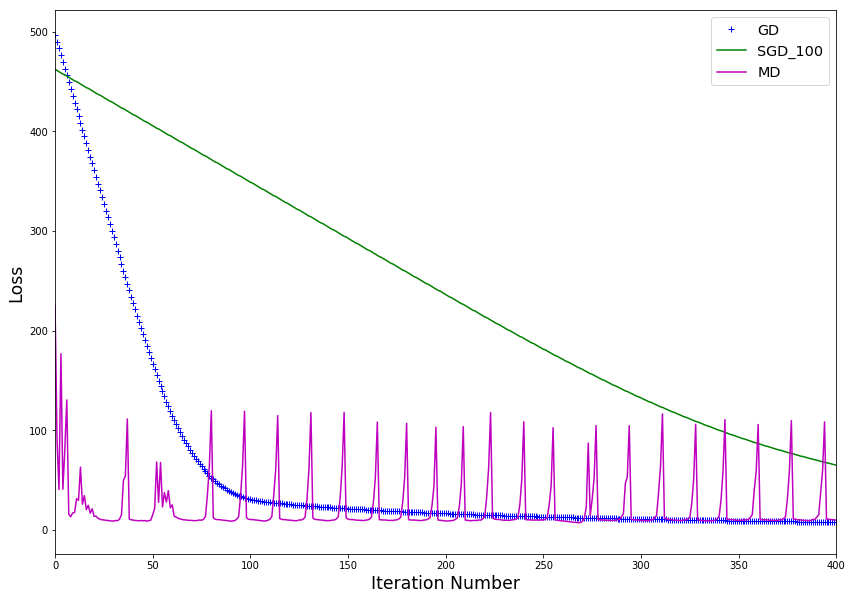

In [7]:
# instantiate our learning rate objects
lr_gd = ExpDecayRate(0.001, 0.0001)
lr_sgd = ExpDecayRate(0.001, 0.00001)
lr_md = ExpDecayRate(0.0001, 0.00001)

# instantiate our descent method objects
gd = GradientDescent()
sgd_100 = GradientDescent()
md = MirrorDescent()

# instantiate logistic regression models
gd_svm = SVM(gd, lr_gd, c, 4000, wbc_n, rel_conv)
sgd_100_svm = SVM(sgd_100, lr_sgd, c, 6000, 100, rel_conv)
md_svm = SVM(md, lr_md, c, 4000, wbc_n, rel_conv)

# fit the models...
print('Fitting gradient descent:')
gd_loss, gd_time = gd_svm.fit(wbc_X_train, wbc_y_train, True)
print('\nFitting stochastic gradient descent, batch size = 100:')
sgd_100_loss, sgd_100_time = sgd_100_svm.fit(wbc_X_train, wbc_y_train, True)
print('\nFitting mirror descent:')
md_loss, md_time = md_svm.fit(wbc_X_train, wbc_y_train, True)

# print the test accuracies for each model
acc = check_accuracy_svm(gd_svm, wbc_X_test, wbc_y_test)
print("\n\nGD Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy_svm(sgd_100_svm, wbc_X_test, wbc_y_test)
print("SGD 100 Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy_svm(md_svm, wbc_X_test, wbc_y_test)
print("MD Accuracy: {0:.2f}%".format(acc * 100))

# run all model fits 99 more times for loss plotting
gd_loss, sgd_100_loss, md_loss = svm_wbc_exp_runs(gd_loss, sgd_100_loss, md_loss, wbc_n, wbc_X_train, wbc_y_train)

# plot the loss convergences for each model
plot_dynamic_svm_losses(gd_loss, sgd_100_loss, md_loss)

#### Square Root Decay Learning Rate

Fitting gradient descent:
Iter:        0 train loss: 397.632
Iter:      400 train loss: 62.100
Iter:      800 train loss: 22.673
Iter:     1200 train loss: 9.349
Iter:     1600 train loss: 4.535
Iter:     2000 train loss: 2.878
Iter:     2400 train loss: 2.080
Iter:     2800 train loss: 1.368
Iter:     3200 train loss: 0.636
Iter:     3600 train loss: 0.364

Fitting stochastic gradient descent, batch size = 100:
Iter:        0 train loss: 605.554
Iter:       20 train loss: 466.222
Iter:       40 train loss: 218.114
Iter:       60 train loss: 11.582
Iter:       80 train loss: 8.846
Iter:      100 train loss: 6.534
Iter:      120 train loss: 5.075
Iter:      140 train loss: 4.045
Iter:      160 train loss: 3.302
Iter:      180 train loss: 2.843

Fitting mirror descent:
Iter:        0 train loss: 1.000
Iter:      400 train loss: 0.997
Iter:      800 train loss: 0.996
Iter:     1200 train loss: 0.995
Iter:     1600 train loss: 0.994
Iter:     2000 train loss: 0.995
Iter:     2400 train los

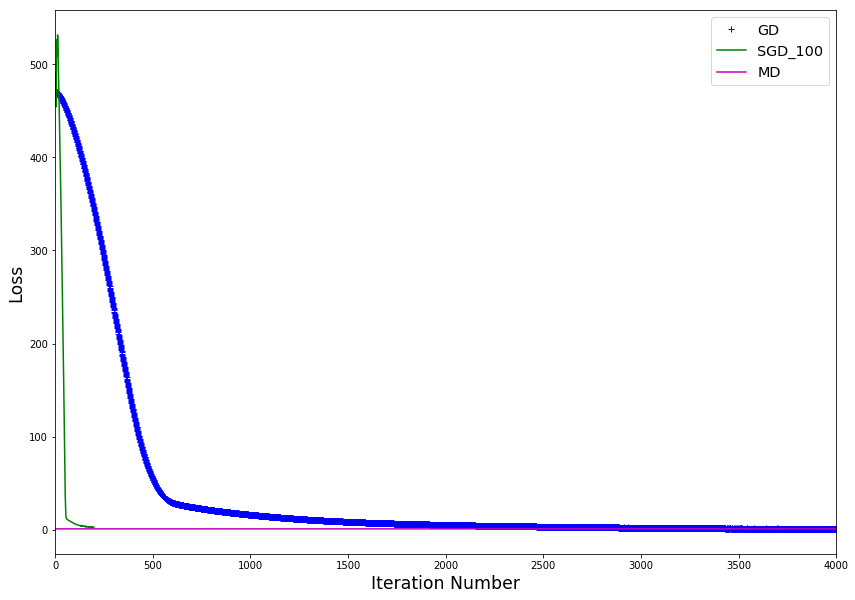

In [6]:
# instantiate our learning rate objects
lr_gd = SqrtDecayRate(0.00001, 1.)
lr_sgd = SqrtDecayRate(0.01, 5.)
lr_md = SqrtDecayRate(0.0000001, 10.)

# instantiate our descent methods
gd = GradientDescent()
sgd_100 = GradientDescent()
md = MirrorDescent()

# instantiate logistic regression models
gd_svm = SVM(gd, lr_gd, c, 4000, wbc_n, rel_conv)
sgd_100_svm = SVM(sgd_100, lr_sgd, c, 200, 100, rel_conv)
md_svm = SVM(md, lr_md, c, 4000, wbc_n, rel_conv)

# fit the models...
print('Fitting gradient descent:')
gd_loss, gd_time = gd_svm.fit(wbc_X_train, wbc_y_train, True)
print('\nFitting stochastic gradient descent, batch size = 100:')
sgd_100_loss, sgd_100_time = sgd_100_svm.fit(wbc_X_train, wbc_y_train, True)
print('\nFitting mirror descent:')
md_loss, md_time = md_svm.fit(wbc_X_train, wbc_y_train, True)

# print the test accuracies for each model
acc = check_accuracy_svm(gd_svm, wbc_X_test, wbc_y_test)
print("\n\nGD Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy_svm(sgd_100_svm, wbc_X_test, wbc_y_test)
print("SGD 100 Accuracy: {0:.2f}%".format(acc * 100))
acc = check_accuracy_svm(md_svm, wbc_X_test, wbc_y_test)
print("MD Accuracy: {0:.2f}%".format(acc * 100))

# run all model fits 19 more times for loss plotting
gd_loss, sgd_100_loss, md_loss = svm_wbc_sqrt_runs(gd_loss, sgd_100_loss, md_loss, wbc_n, wbc_X_train, wbc_y_train)

# plot the loss convergences for each model
plot_dynamic_svm_losses(gd_loss, sgd_100_loss, md_loss,4000)

### SVM WBC Analysis

Additionally, and very unfortunate from an analysis standpoint, the SVM loss has difficulty converging for a number of different method combinations as it is very noisy and rarely happens to achieve our relative convergence condition, making analysis for those algorithms difficult to draw meaningful quantitative conclusions from since that means those runs cannot be considered the same as those that accomplished our relative convergence condition. Due to this, our analysis of these runs is mostly confined to a space of general qualitative results - we can still see about where the algorithms converge, and we know the relative speed of the algorithms over each iteration, so we can tell the relative performance. In light of this, however, we restrict our SVD objective investigation to the WBC data set.

Since none of the algorithms for the fixed step size consistently converge, it is difficult to make any significant comments on the convergence rate performance for any of them. However, at the least, we can see that all of the models successfully converge (to some noisy degree) to a solution of similar loss and of good test accuracy for the WBC data set that is comparable to the performance of the logistic loss objective. The runtime performance looks poor because the runs never truly converge (and so go for the maximum set number of iterations), but, in fact, the SVM objective seems to converge faster than its logistic loss counterpart. This make sense as this dataset seems to be fairly good (separable), which means the SVM will quickly find a separating hyperplane. In this case, the plane seems to keep rotating somewhat, preventing the algorithms from fully reaching the relative convergence condition consistently.

The resulting use of the exponential and square root decay learning rates just displayed somewhat faster convergence. However, this may be artificial as the convergence may just be somewhat more well-behaved for these learning rates. This is showcased by the fluctuation of the mirror descent algorithm above the converged loss value. The square root decay learning rate does a better job of accelerating the convergence of GD and SGD, with SGD in particular converging extremely quickly, but also not converging to neccessarily the best point (79.29% test accuracy).

On the whole, we can say that the SVM objective certainly works for this problem type, but in lieu of eliminating some of the noisiness of the convergence, meaningful analysis of the relatiev convergence rate between the algorithms as was done for logistic regression is not possible.

### Conclusion
From this project, we were able to gain experience in building a modularized machine learning framework with multiple objectives, descent algorithms, learning rates, and data sets. The comparative analysis we were able to perform by virtue of setting a common relative convergence condition.

For future work like this, we think that we would also choose this modular type of framework, but that we would make sure we were certain about what the different methods we would be implementing would be. Throughout the project, we had to make minor adaptations to our frameworks in order to get the different algorithms working properly together. In particular, SVRG needed different access to the training data than the other methods, and it also makes its stochastic updates internally, making a careful tracking of the loss much more cumbersome.

Additionally, if we had the time to fully run out all of the tests on it, we had a MNIST binarized data set prepared for use for these problems. The MNIST binarized set we had compiled was slightly smaller than the COD-RNA data set, but had a feature size of two orders of magnitude greater and, in some priliminary test runs we made, this did have an effect on the relative convergence rates of our methods.
